# PH150 Week 3 - Determining g
This week we will using measurements and curve fitting to determine the value of the acceleration due to gravity $g$.  By using curve fitting instead of just averaging we are able to use multiple different measurements to find a single value.  The errors in each of these measurements often cancel to produce a value that is much more accurate. We also look at some more details about plots and how to find the error in fit parameters.  


# Model
The physical system we will look at in this lab is a object falling under the influence of gravity. We will assume that this system has a constant acceleration. When we do this we can use the standard kinematic equation 

$$y=y_0+v_0t+\frac{1}{2}at^2$$

For the system we will look at this is a reasonable assumption (that the acceleration is constant) but for future systems we will study this will not be true. We will need to develop other methods to accurately model them.

# Measurement
For this lab you will be using a spark timer. This is a devise that puts a small dot on a strip of paper every $\frac{1}{60}$ of a second. The strip of paper is attached to a weight and dropped. In this way you get the position of the weight marked every $\frac{1}{60}$ of a second. You will need to measure the distance from the starting point to each dot as accurately as possible. Because the time interval is set between when each dot is made you don't need to measure this. However, it is recommended that each dot be labeled 1,2,3, etc. so that the time from the start can be determined for each. You will need to make an array for both the position and the time data. The position data will just have to be entered by hand. The time data could also be entered by hand like so:

In [111]:
from numpy import *  #first import the libary so we can use its functions
t=array([1/60,2/60,3/60]) # enter each value in by hand, at least we can use fractions
print(t) # check to see what it looks like

[0.01666667 0.03333333 0.05      ]


But because the time data is uniform you can use a function to do it for you. There are a number of different ways to go about this. This is just one way. In the numpy library there is a function called 'arange'. This stands for array range and creates an array starting with the first number and going to the next number in increments of the third number. Like so

In [112]:
t=arange(1/60,.2,1/60) # a very nice function to fill an array with evenly spaced values. This will be used again.
print(t) # check to see what it looks like

[0.01666667 0.03333333 0.05       0.06666667 0.08333333 0.1
 0.11666667 0.13333333 0.15       0.16666667 0.18333333 0.2       ]


In this way you can create a very large array very fast.

## Error
Every measurement has an error or uncertainty associated with it. In this lab the largest uncertainty will be in your measurement of distance. The time measurements also have an uncertainty but they are so small compared to the distance measurements they will be ignored. When you make your measurements do the best you can to measure as accurately as you can then think about how well you know the values that you measure. Could they be 0.1cm more or less? How about 0.05cm? The tick marks on the meter stick are 1mm apart. However, usually you can tell if a value is half way between these. It may also depend on the dot you are measuring. Is it smeared out so it is hard to tell exactly where it is. There is often a degree of judgement when determining the error in your measurement. In general, your error should be as small as possible, but not smaller than reasonable. So that if someone else were to measure the same thing they would have about a 70% chance of getting a value within your measurement $\pm$ your uncertainty value.

## Plotting with error bars
When plotting data it is a good idea to also plot the error in the data.  This is done with error bars. We first need an array of numbers with the error in the y values. It is common for the largest error in our measurements to be in the y values and for the error in the x values to be so small they are not important.  This isn't always the case, but for this class we'll stick with the error always in the y values. To show how this works I'll use an example.  First define the values in the arrays for $x$, $y$ and for the error in $y$, $ysigma$. The $sigma$ stands for the standard deviation and has the symbol $\sigma$.

In [113]:
x = array([0,20,40,60,80,100])
y = array([-0.849,-0.196,0.734,1.541,2.456,3.318])
ysigma=array([0.05,0.05,0.05,0.05,0.05,0.05])

In [114]:
x = array([0.,20.,40.,60.,80.,100.])
y = array([-2.2,.89,60,120,300,450])
ysigma=array([0.5,1,30,50,70,30])

Then we use the function from the matplotlib plotting library 'errorbar' to set the values of the error bars and to plot the data.

Text(0.5, 1.0, 'A title for the plot')

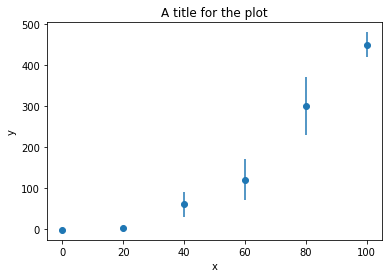

In [115]:
from matplotlib.pyplot import *
%matplotlib inline

errorbar(x, y, yerr=ysigma,fmt='o')
ylabel('y')
xlabel('x')
title('A title for the plot')

Every plot should have also have labels for the x and y axis. Make them specific to the application. Don't just use $x$ and $y$. Also a title helps describe what the plot is about. Please use each of these for all of your future plots.

## <b><span style="color:red;">Your Assignment:</span></b>  
Measure and plot:
- Measure the distance from the start to each dot on the paper strip. For each value also record the error. 
- Put these values in their own arrays and create a time array with the same number of values.
- Make a plot of distance vs time with error bars. Be sure each axis is properly labeled and that the plot has a title.

# Fitting to find parameters

Physics and most other sciences involve finding predictable patterns in nature. We call these patterns models. A crucial step in this process is checking to see if the model matches the data. We matched this pattern $C=\pi D$ to circumference and diameter data last week. Today you will check one of the kinematic equations you have used in PH121.

$$y=y_0+v_0t+\frac{1}{2}at^2$$

You'll use the same fitting function from the numpy library that you used last week, only this time we'll use some of its other features. Take a look here to see what other inputs it can take: [numpy.polyfit](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html). Play close attention to the input $w$. It allows you to include the effects of the error for each data point in the fit. This way if there is a large error for one data point it won't factor in as much in the fitting as a data point with a very small error. This is done by setting $w$, the weighting factor, to one over the error like so: $$w=\frac{1}{\sigma}$$ Here is what it looks like in the code:

In [116]:
coefficients = polyfit(x, y,2,w=1/ysigma) # note the 2 instead of one. This is because it is now going to fit it to a 2nd order polynomial that matches our model.
print(coefficients)

[ 0.05484759 -0.94166785 -2.2013302 ]


These numbers, like last week, are the values that go in front of our variable. Also like last week we should compare our fit with the data by plotting both on the same plot like so

Text(10, 400, 'y=0.055x*x+-0.942x+-2.201')

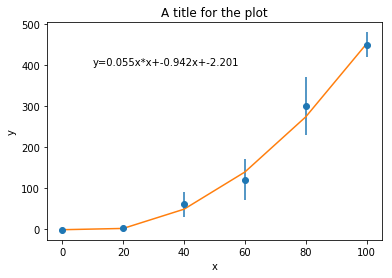

In [117]:
ycal=polyval(coefficients,x) # computes the y values for our fit using the coefficients from our fit and the x values

errorbar(x, y, yerr=ysigma,fmt='o') # plots the data with error bars
plot(x,ycal) # plots the fit
ylabel('y')
xlabel('x')
title('A title for the plot')
text(10, 400, 'y={0:.3f}x*x+{1:.3f}x+{2:.3f}'.format(coefficients[0],coefficients[1],coefficients[2])) # take a look at this closely and see if you can figure out what it is doing.

## Error in parameters
The polyfit function gives us the parameters of our fit, in this case these are the coefficients of a 2nd order polynomial. But it would also be nice to know how well we know these values. What is their uncertainty? This can be found with another input to the polyfit function called 'cov'. This stands for the covariance matrix. If this input is set to $True$, or in our case 'unscaled' then the function also gives us a matrix. The diagonal elements of this matrix are the uncertainty in our parameters squared. So by square rooting it we can find the error in each of our parameters. like so.

In [118]:
[cof,mat]=polyfit(x, y,2,w=1/ysigma,cov='unscaled') #gets the fit parameters and the coveraance matrix that we can use to find the error for each parameter.

print(cof[0],'with error of',sqrt(mat[0,0]))
print(cof[1],'with error of',sqrt(mat[1,1]))
print(cof[2],'with error of',sqrt(mat[2,2]))

0.054847585002155634 with error of 0.0036338714045759776
-0.9416678493122186 with error of 0.09999073754276963
-2.201330196139873 with error of 0.49995738555847724


All the digits are a bit much, especially now that we know the error. Let’s use the same format function to fix this up a bit like so

In [123]:
print('{0:.4f} with error of {1:.4f}'.format(cof[0],sqrt(mat[0,0])))
print('{0:.3f} with error of {1:.3f}'.format(cof[1],sqrt(mat[1,1])))
print('{0:.3f} with error of {1:.3f}'.format(cof[2],sqrt(mat[2,2])))

0.0548 with error of 0.0036
-0.942 with error of 0.100
-2.201 with error of 0.500


You can then take these values and format them very nice in a markdown cell. The values and uncertainties from the fit to our data of the 2$^{nd}$ order polynomial $a+bx+cx^2=y$ is

| Parameter | value   | $\pm \sigma $ |
| -------  |:-------:| -----:|
| a         |  -2.201 |  0.50   |
| b         |  -0.942 |  0.10   |
| c         |  0.0548 |  0.0036 |

## <b><span style="color:red;">Your Assignment:</span></b>  
Fit with error:
- Fit your data to a 2nd order polynomial. 
- Include the cov='unscaled' and the weight to get parameters with their error.
- What value of g best matches your data and what is its error?
- Make a plot with your data, the fit and the equation that matches the fit. Be sure to label axis and give it a title.